In [7]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import BoundaryNorm
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [55]:
def map_inext_sampling_coverage(grid, column, num_intervals, cmap, vmin, vmax):
    grid_gdf = gpd.read_file(f'grids/{grid}km_behrmann_grid.shp')
    output_df = pd.read_csv(f'iNext_output/{grid}_summary.csv')

    # join the two dataframes by the grid id
    output_df["tile_id"] = output_df["id"]
    grid_gdf = grid_gdf.merge(output_df, on='tile_id')

    world = gpd.read_file("data/ne_50m_land.shp").to_crs("ESRI:54017")

    # plot grid800 with column obs.D0 values using behrmann grid as background map
    fig, ax = plt.subplots(figsize=(20, 20))
    
    # Define the number of intervals
    bounds = np.linspace(vmin, vmax, num_intervals + 1)
    norm = BoundaryNorm(bounds, ncolors=256)

    grid_gdf.plot(column=column, ax=ax, cmap=cmap, norm=norm)
    world.boundary.plot(ax=ax, edgecolor="white", linewidth=0.5)
    ax.set_facecolor('black')

    # add legend
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm._A = []

    # Create an Axes for the colorbar that matches the height of the main plot
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = plt.colorbar(sm, cax=cax, boundaries=bounds, ticks=bounds)
    cbar.set_label(column)

    # remove ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    # center title
    #ax.set_title(f'{grid}km grid with {column} values', fontsize=20, loc='center')
    plt.savefig(f'figs_for_submission/{grid}_{column}.png')
    plt.show()

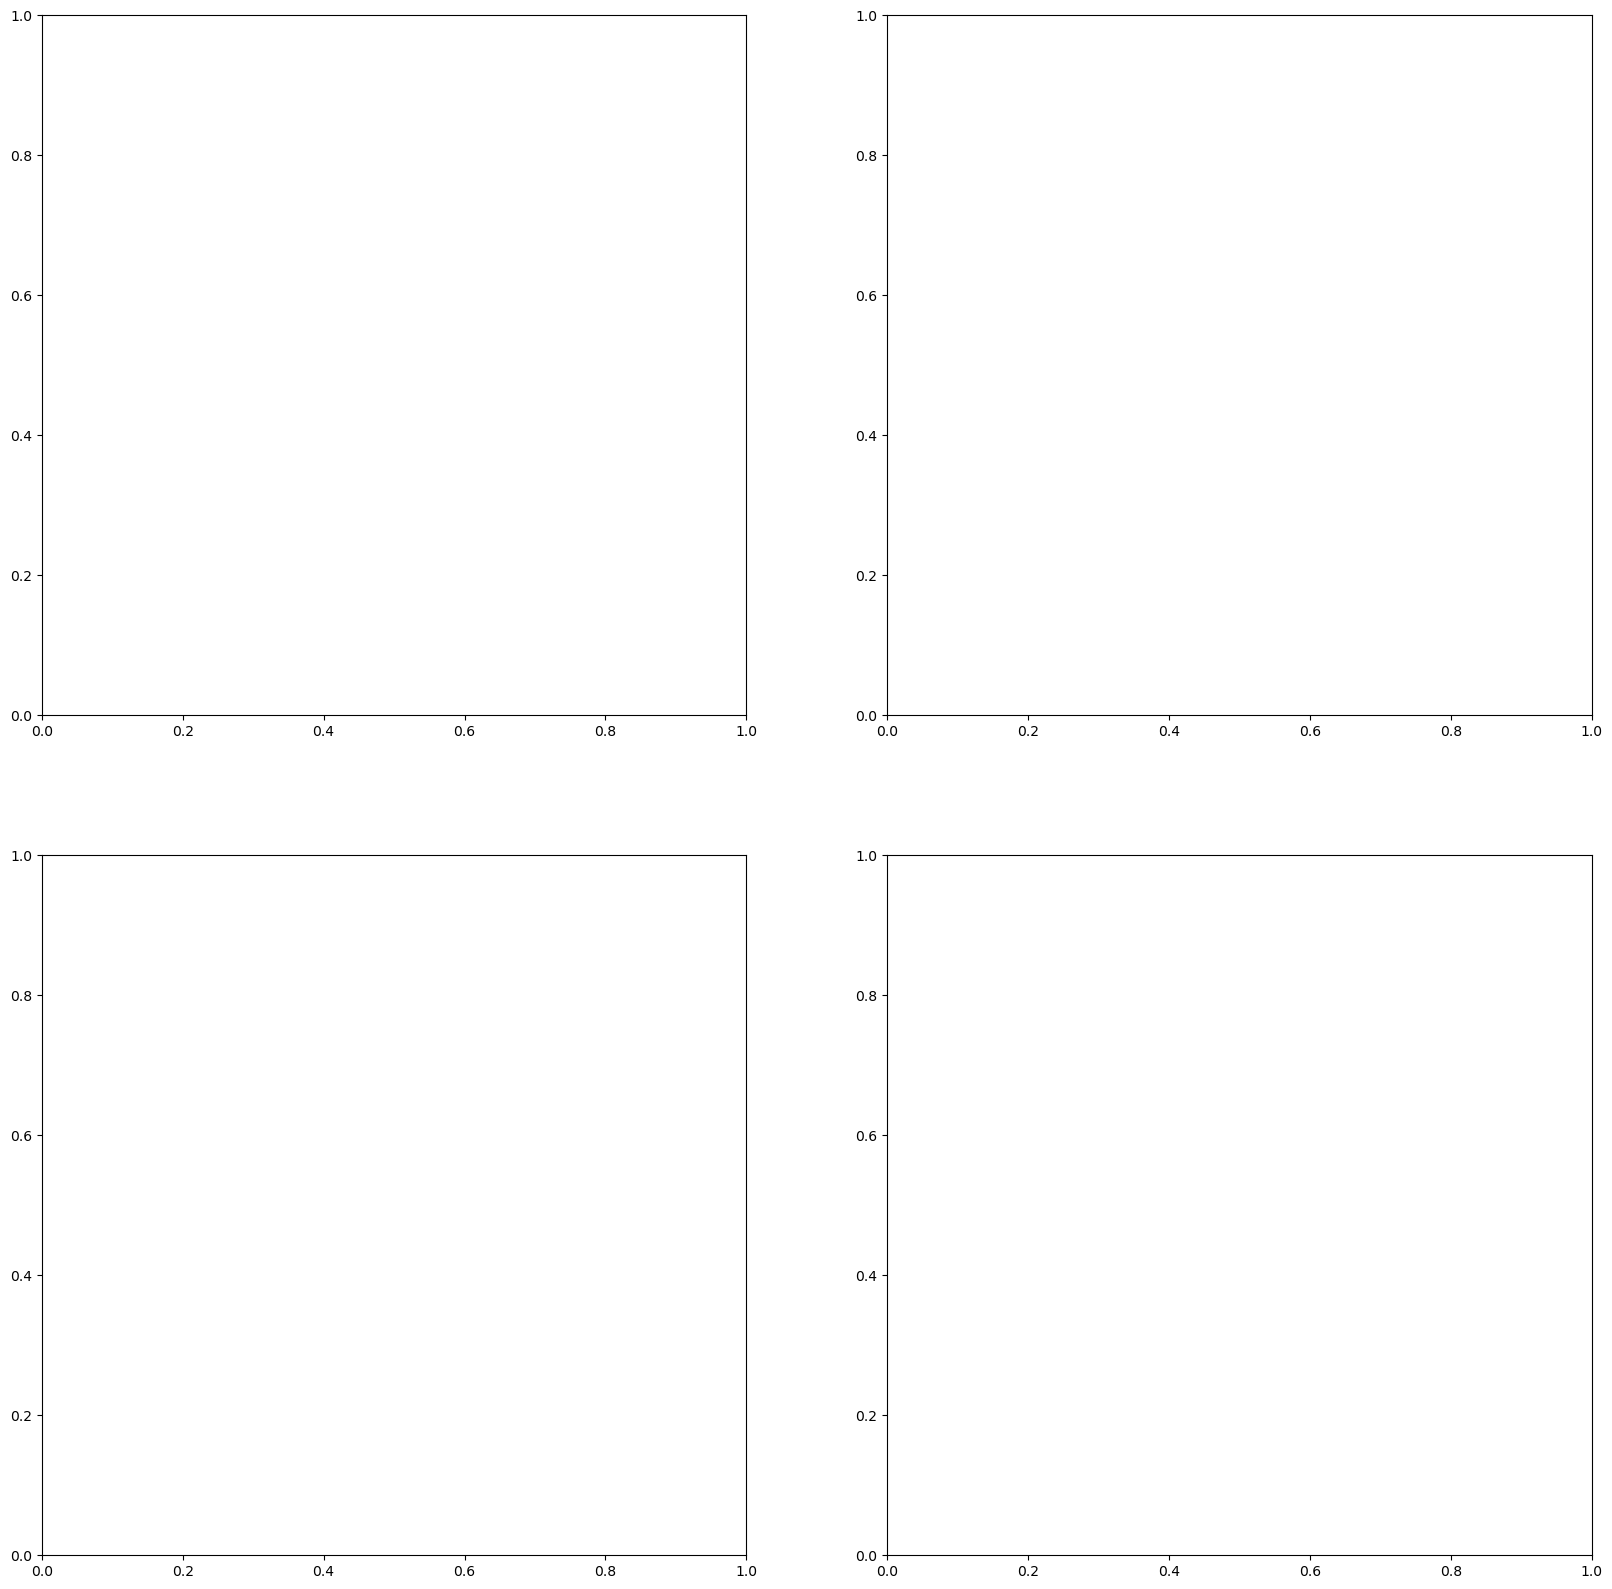

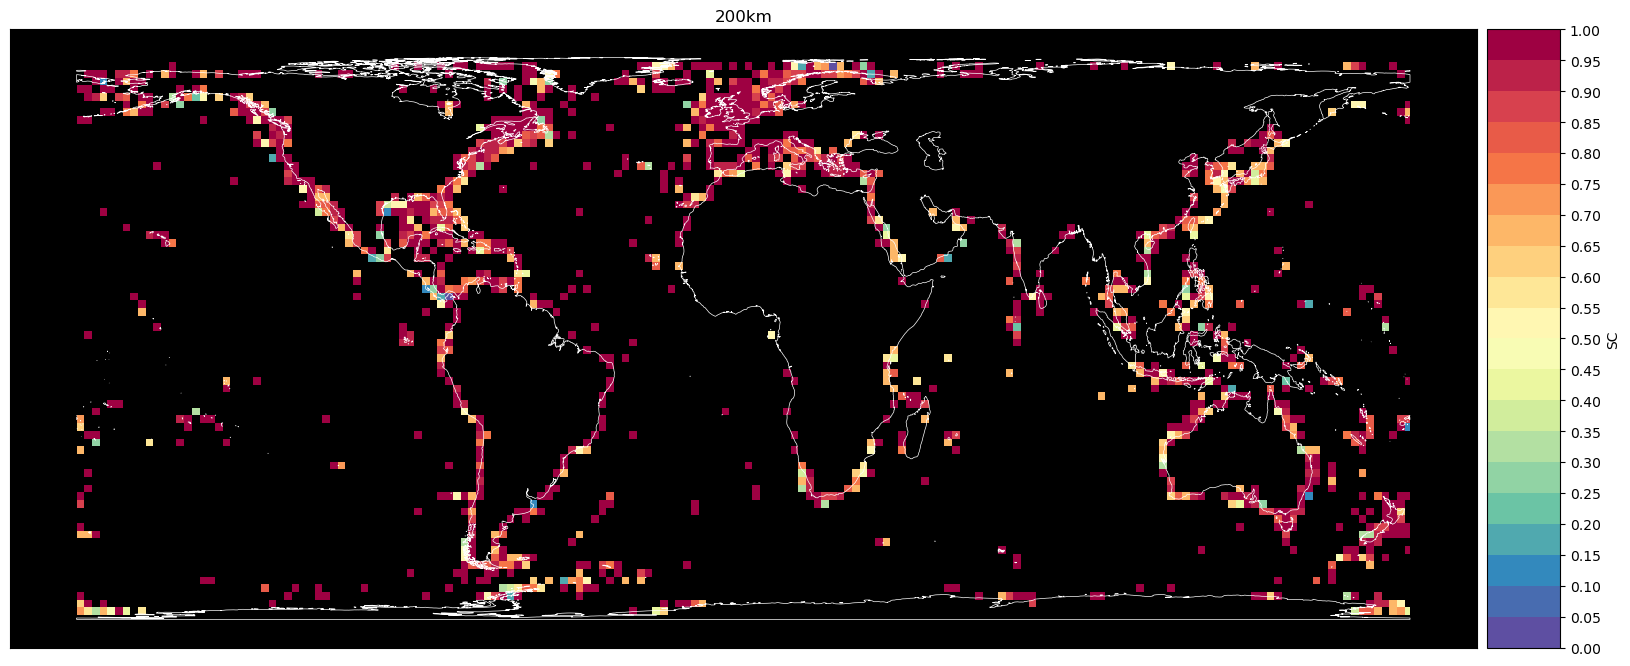

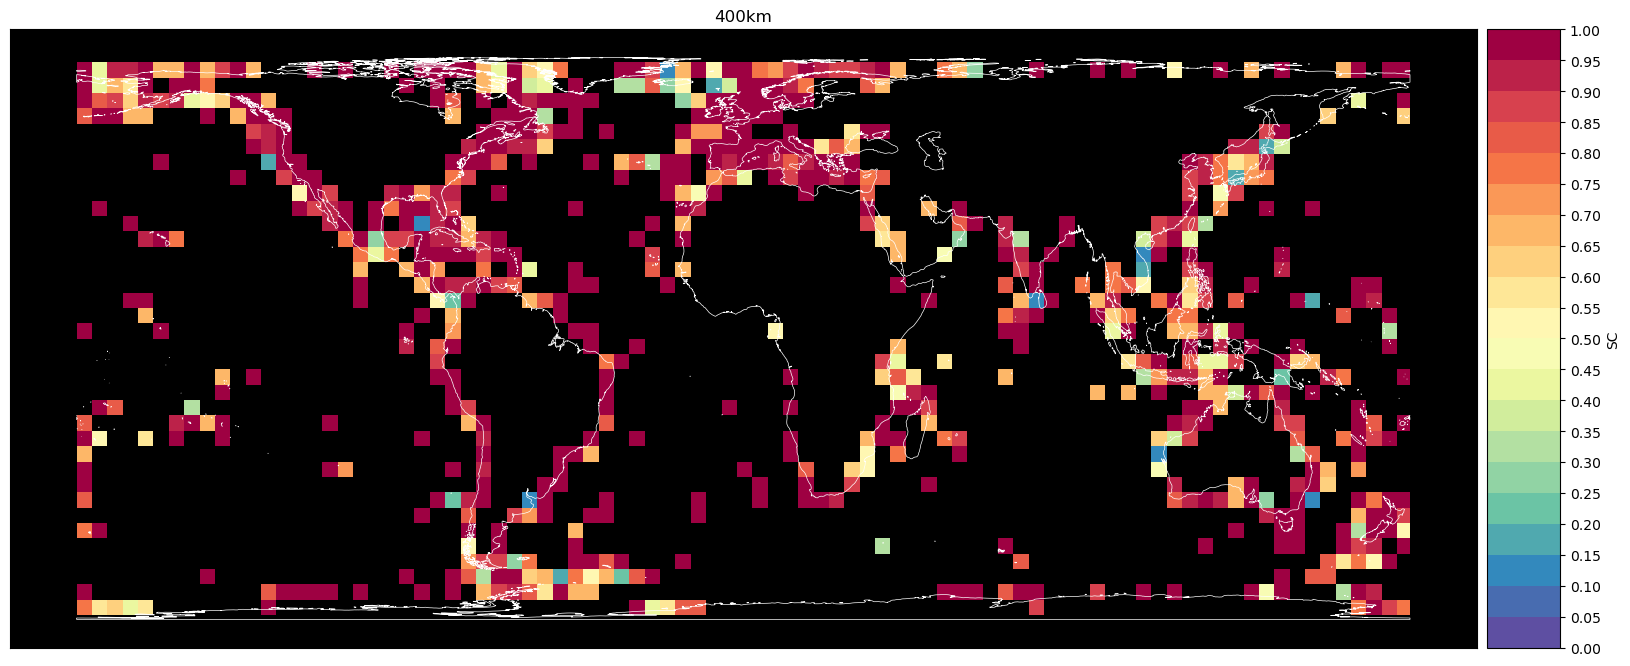

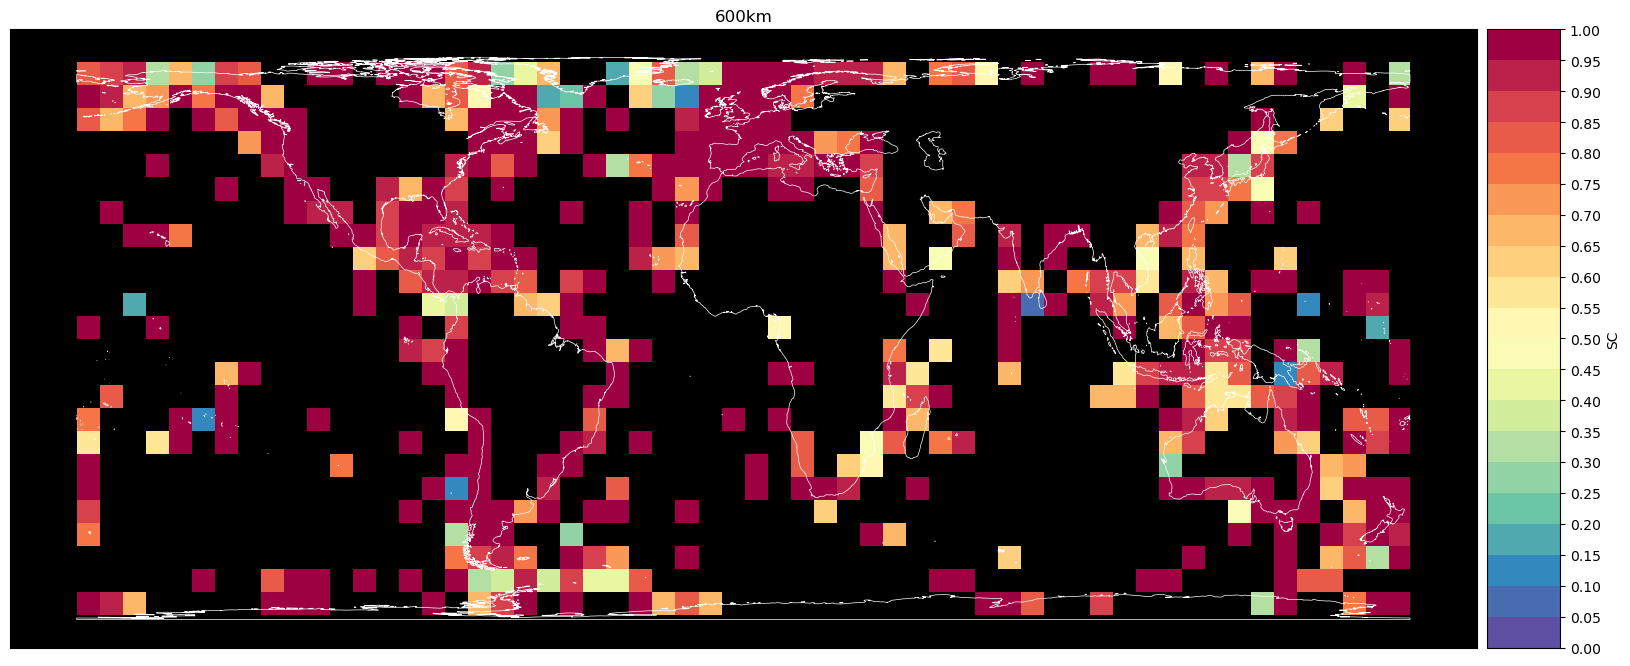

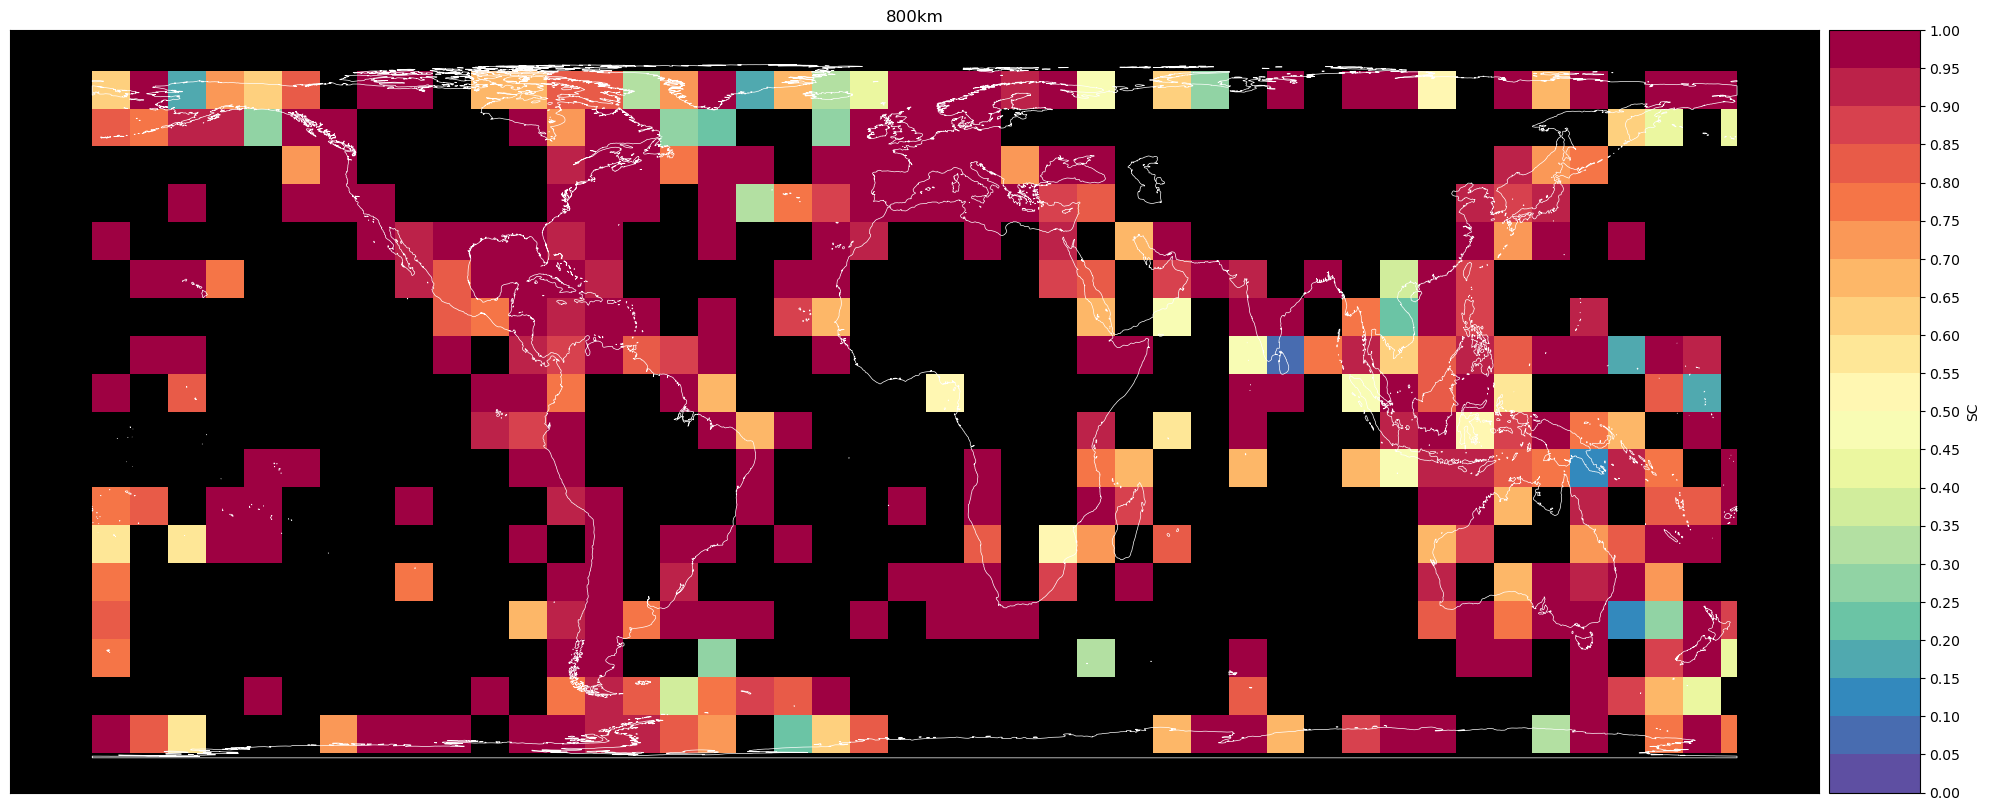

In [29]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# List of grid sizes
grids = ['200', '400', '600', '800']

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Call the function for each subplot
for ax, grid in zip(axs, grids):
    map_inext_sampling_coverage(ax, grid, 'SC', 20, "Spectral_r", 0, 1)

plt.tight_layout()
plt.show()

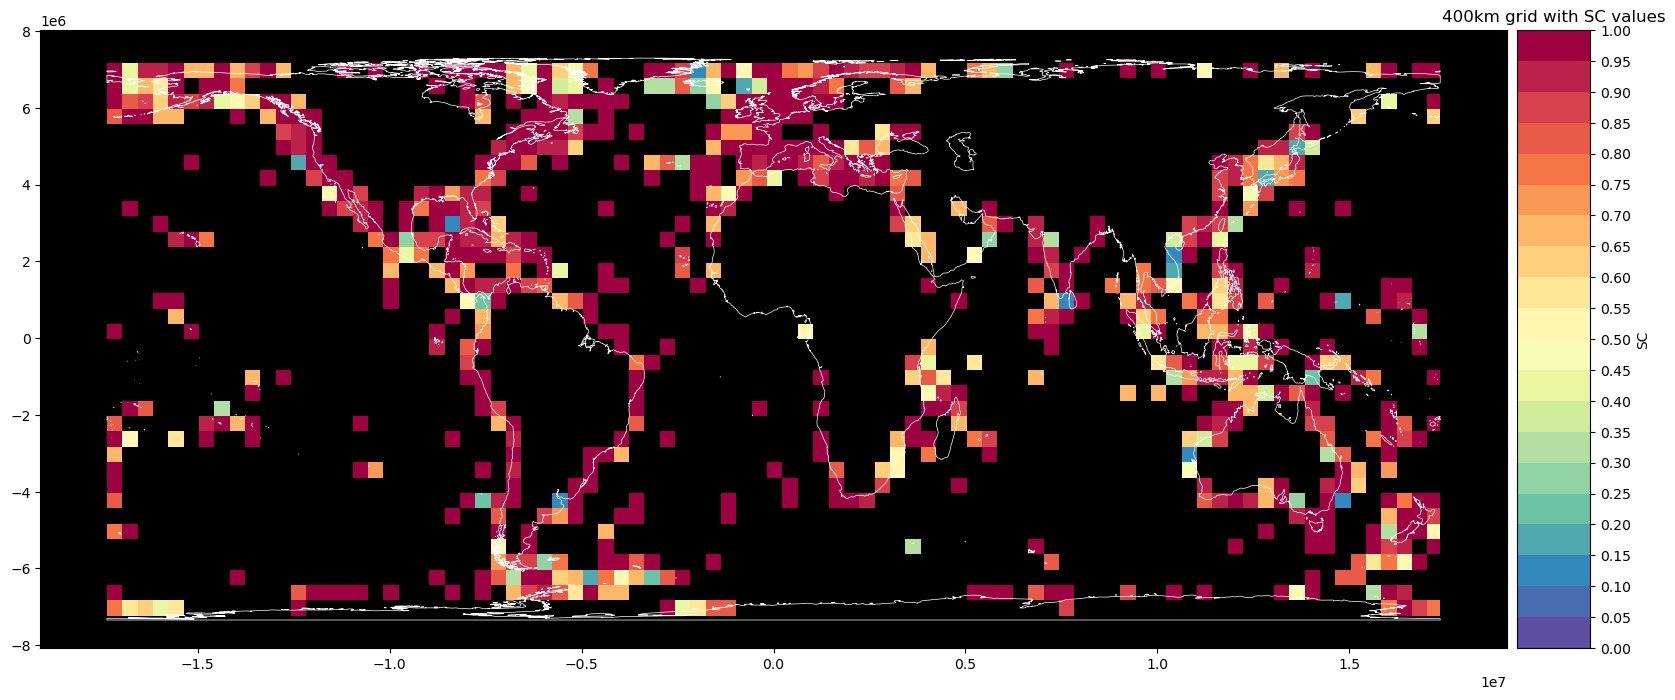

In [21]:
map_inext_sampling_coverage(400, 'SC', 20, "Spectral_r", 0, 1)

In [58]:
diversity_indices = ['obs.D0', 'SC2.D0', 'SC5.D0', 'SC7.D0']

### TODOS
- Row for each resolution of `[obs.DO, SC2.D0, SC5.D0, SC7.D0]`
- Add key
- Use latitude/longitude values

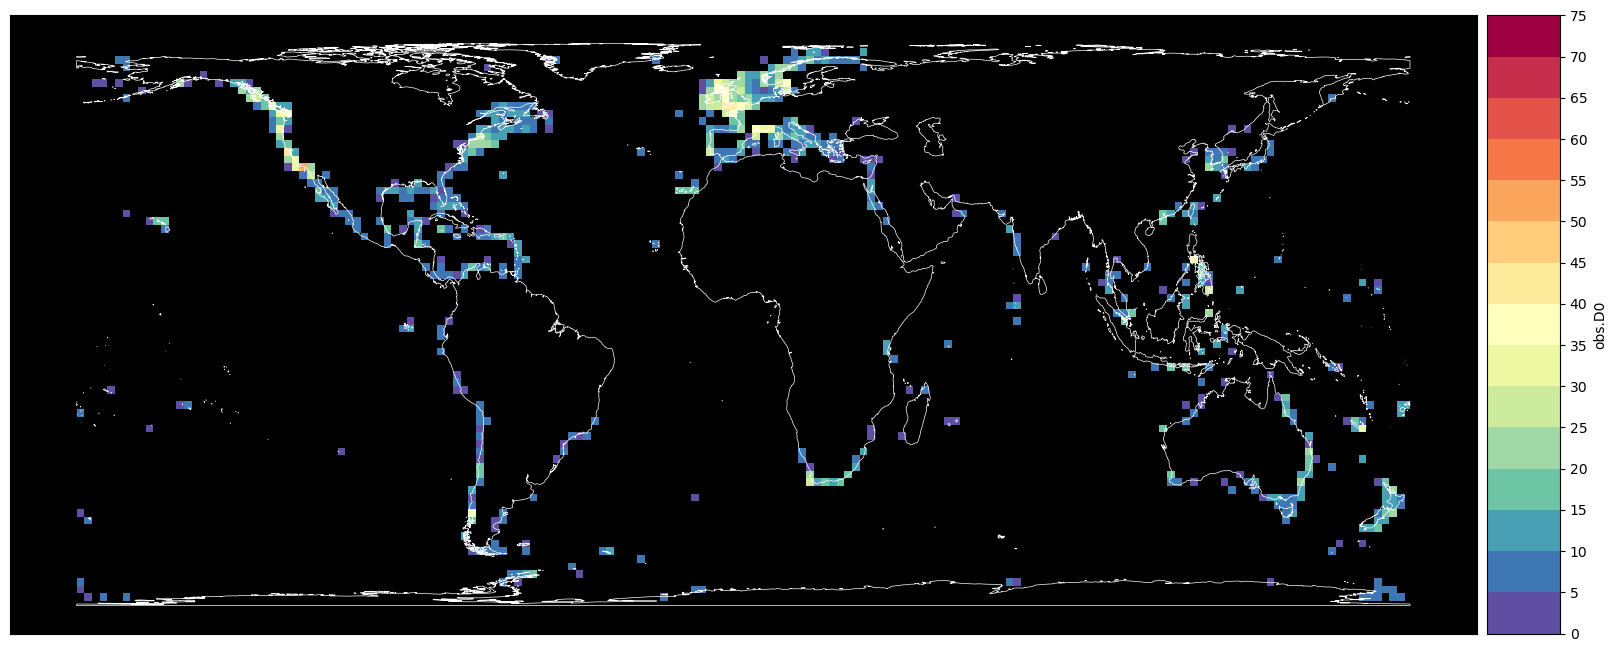

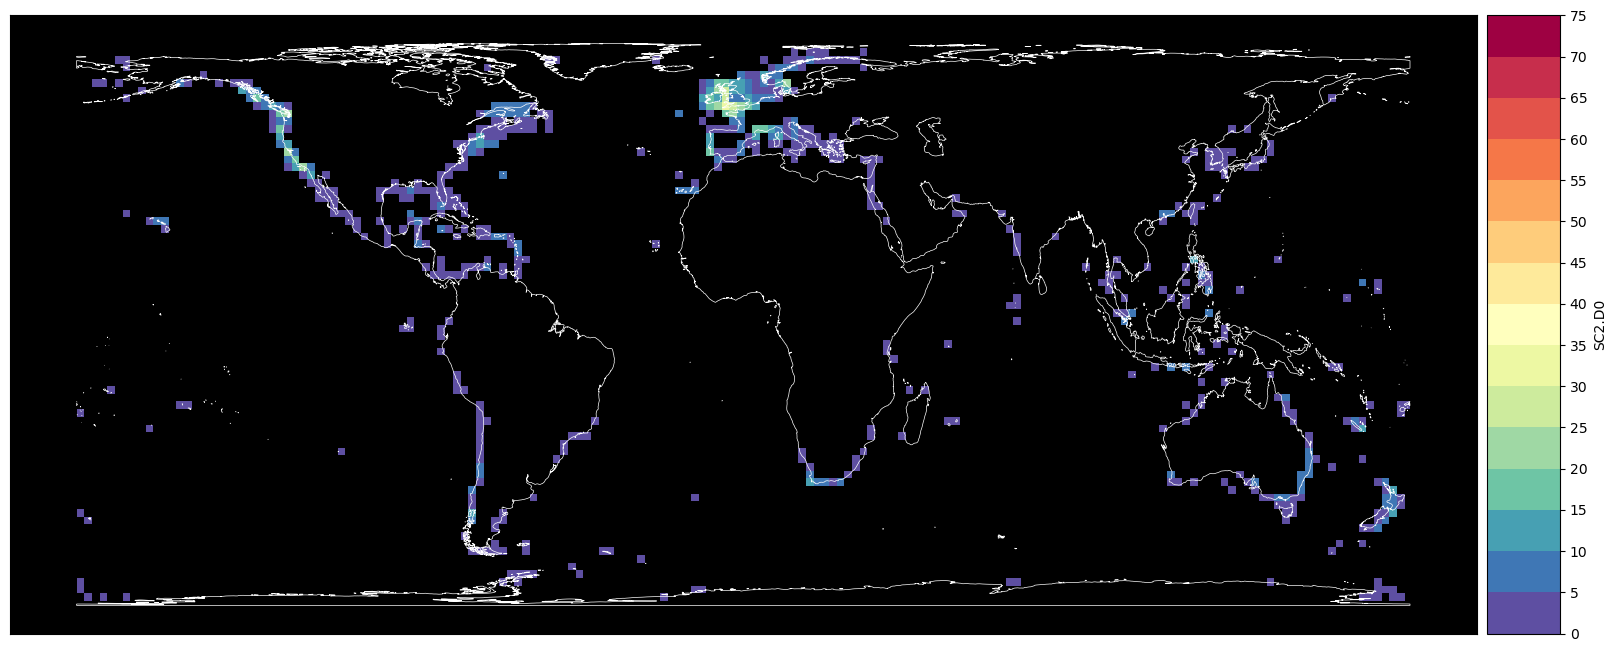

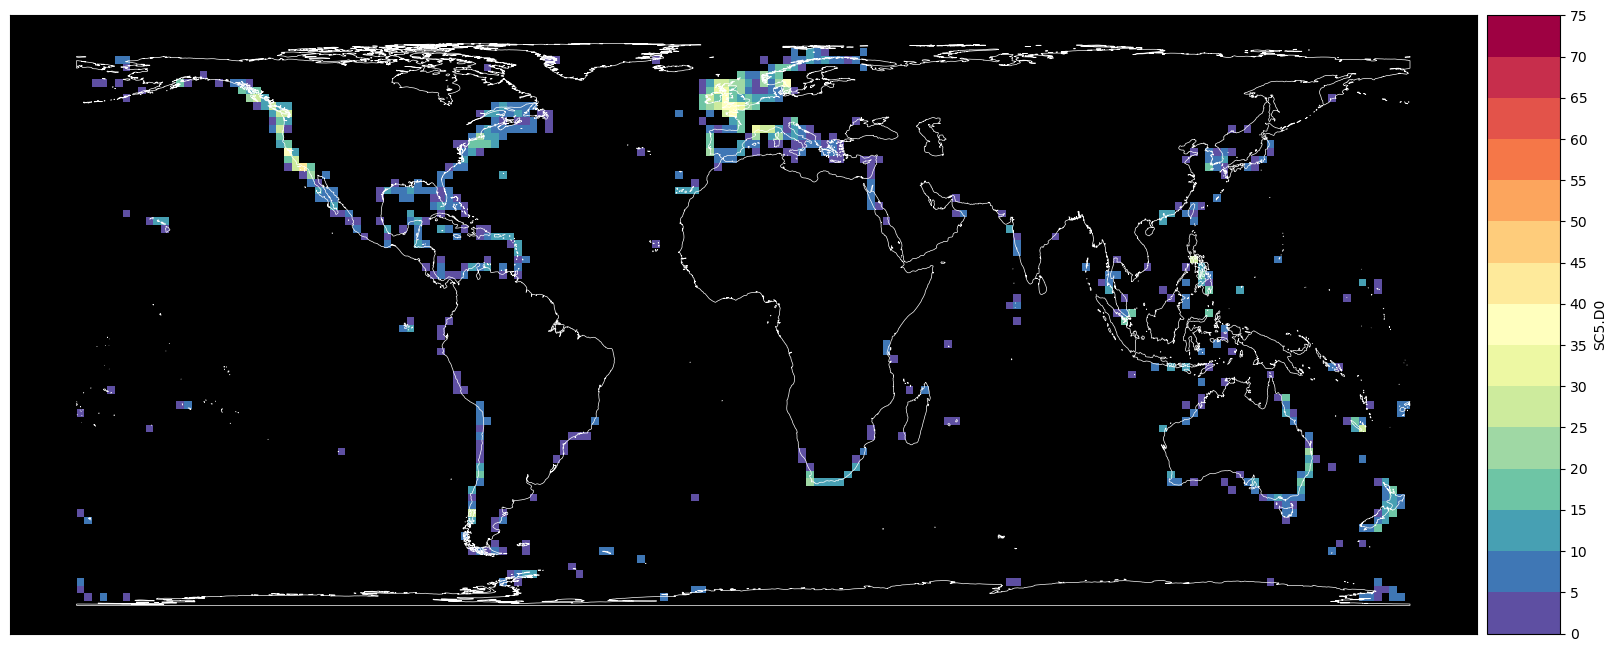

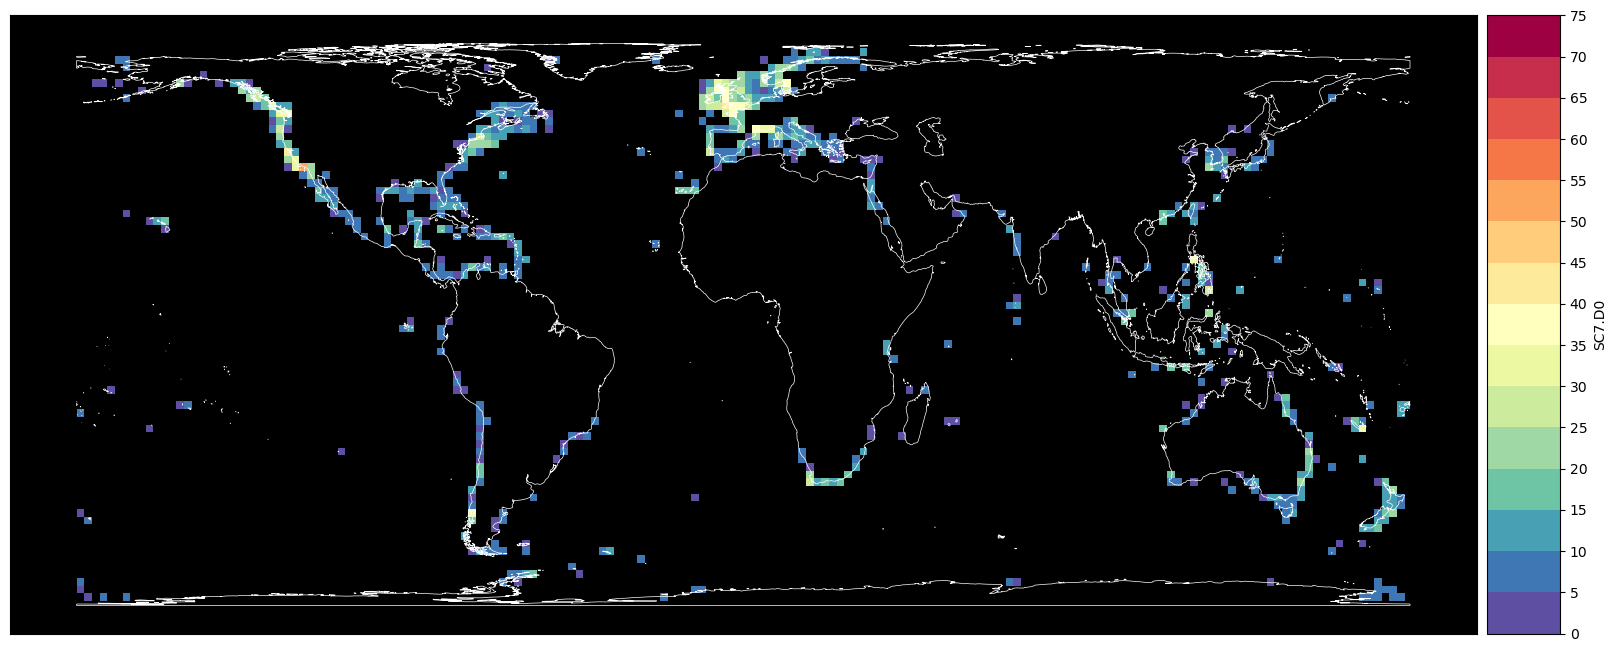

In [62]:
for diversity_index in diversity_indices:
    map_inext_sampling_coverage(200, diversity_index, 15, "Spectral_r", 0, 75)